In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [85]:
import flylib as flb
import db_access as dba
import group_data as gd
#fly_db = dba.get_db()
squadron = flb.NetSquadron([518,524,525,526,527])
fly = squadron.flies[2]
#fly = gd.GMR22H05_prc_swarm.flies[0]
fly.open_fly_record()

In [86]:
imgs = np.array(fly.fly_record['experiments'].values()[0]['tiff_data']['images'])

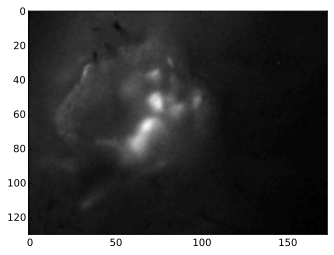

In [87]:
img = np.array(imgs[100])
imshow(img,cmap = cm.gray)

In [88]:
thorax_frame = fly.get_pkl_data('basis_fits.cpkl')500

SyntaxError: invalid syntax (<ipython-input-88-520aa5e6244c>, line 1)

In [89]:
A = thorax_frame['A']

In [90]:
import os
os.listdir(gd.muscle_anatomy_dir)

['65G06', 'ad_hoc_masks', 'confocal_outline_model.cpkl', 'registration']

In [91]:
import muscle_model as mm
confocal_model = mm.GeometricModel(filepath = gd.muscle_anatomy_dir + 'confocal_outline_model.cpkl')
confocal_view = mm.ModelViewMPL(confocal_model)
import cv2
import cPickle
pkname = fly.fly_path + '/basis_fits.cpkl'
fly_frame = mm.Frame();fly_frame.load(pkname)

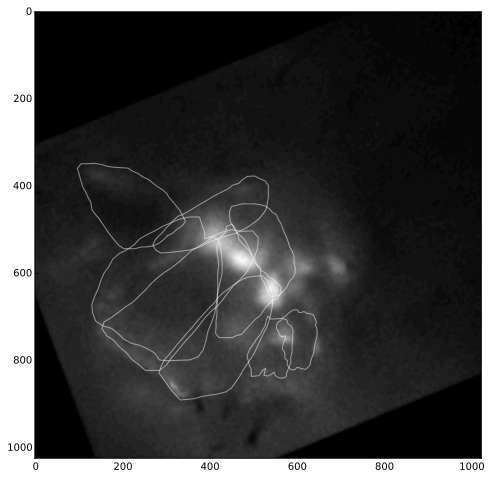

In [92]:
figure(figsize = (8,8))
s = 1
A = confocal_model.frame.get_transform(fly_frame)
#compose the transformation matrix with a scaling matrix
Ap = np.dot([[s,0.0,0],[0,s,0],[0,0,1]],A)
output_shape = (np.array([1024,1024])*s).astype(int) #confocal shape * the scale
output_shape = (output_shape[0],output_shape[1]) #make the shape a tuple
X_warped = cv2.warpAffine(img.T,Ap[:-1,:],output_shape) #warp the image using the cv2 warp Affine method
imshow(X_warped,cmap = cm.gray)
contour_kwargs = {'b3':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'b1':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'b2':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'i1':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'iii1':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'tpv':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'tpd':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'iii3':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'hg4':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5}}
confocal_view.plot(confocal_model.frame,contour_kwargs = contour_kwargs)

In [79]:
fly.get_pkl_data('epoch_data.cpkl')

{'baseline_F': [0, 100]}